In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
sleep_hours = pd.read_csv('sleep4.csv')
print(sleep_hours.columns)

Index(['Stress', 'Physical_activity', 'recreational_activity',
       'Meditation_minutes', 'noise', 'light', 'wearning_socks', 'calories',
       'sleeping_hours'],
      dtype='object')


In [4]:
sleep_hours.head()

,Stress,Physical_activity,recreational_activity,Meditation_minutes,noise,light,wearning_socks,calories,sleeping_hours
0,12.32,yoga,writing,6,0,on,no,1600,19.6
1,30.23,yoga,audio books,8,0,on,no,1800,7.6
2,34.26,none,audio books,6,0,on,yes,1999,4.4
3,14.78,yoga,audio books,8,0,off,yes,2000,10.5
4,20.20,yoga,audio books,5,0,off,no,2300,8.4


In [4]:
sleep_hours.dtypes

Stress                   float64
Physical_activity         object
recreational_activity     object
Meditation_minutes         int64
noise                      int64
light                     object
wearning_socks            object
calories                   int64
sleeping_hours           float64
dtype: object

In [5]:
sleep_hours.describe()

,Stress,Meditation_minutes,noise,calories,sleeping_hours
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,27.827337,10.331658,1.125628,1952.613065,6.911055
std,7.686261,3.394968,1.395989,281.539017,2.521539
min,10.350000,3.000000,0.000000,1200.000000,1.500000
25%,22.575000,8.000000,0.000000,1750.000000,5.150000
50%,27.690000,10.000000,0.000000,1947.000000,6.400000
75%,34.270000,15.000000,2.000000,2105.500000,8.400000
max,40.850000,15.000000,5.000000,2999.000000,19.600000


In [6]:
def count_unique(sleep_hours, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(sleep_hours[col].value_counts())

cat_cols = ['Physical_activity','recreational_activity', 'light', 'wearning_socks']
count_unique(sleep_hours, cat_cols)


For column Physical_activity
yoga       84
running    70
none       45
Name: Physical_activity, dtype: int64

For column recreational_activity
audio books    80
writing        77
painting       42
Name: recreational_activity, dtype: int64

For column light
off    166
on      33
Name: light, dtype: int64

For column wearning_socks
no     107
yes     92
Name: wearning_socks, dtype: int64


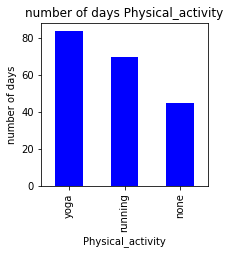

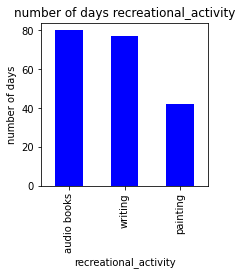

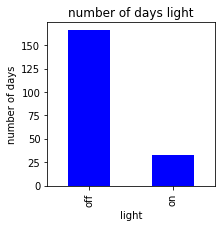

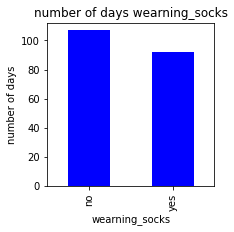

In [7]:
def plot_bars(sleep_hours, cols):
    for col in cols:
        fig = plt.figure(figsize=(3,3)) # define plot area
        ax = fig.gca() # define axis    
        counts = sleep_hours[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('number of days ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('number of days')# Set text for y axis
        plt.show()

plot_cols = ['Physical_activity','recreational_activity', 'light', 'wearning_socks']
plot_bars(sleep_hours, plot_cols)

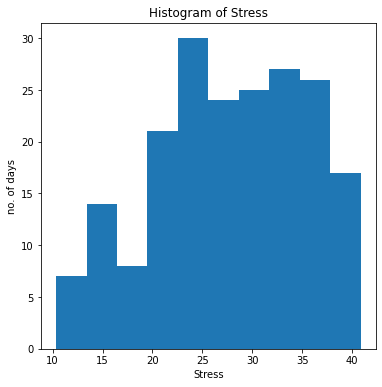

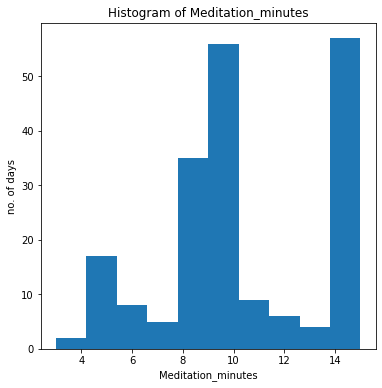

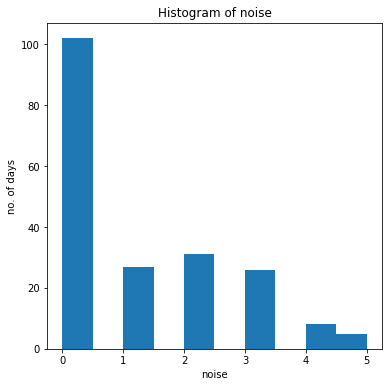

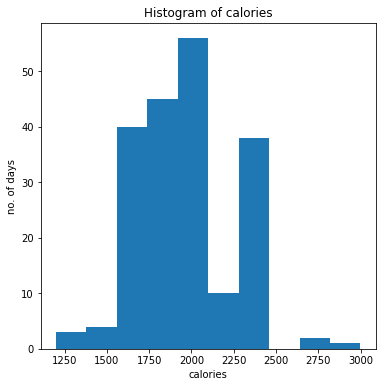

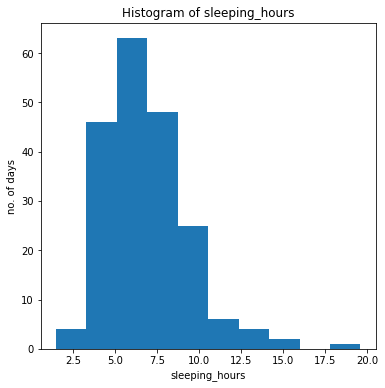

In [8]:
def plot_histogram(sleep_hours, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        sleep_hours[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('no. of days')# Set text for y axis
        plt.show()
        
num_cols = ['Stress', 'Meditation_minutes', 'noise', 'calories', 'sleeping_hours']    
plot_histogram(sleep_hours, num_cols)

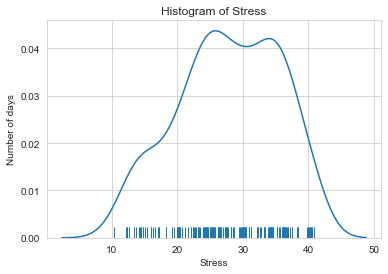

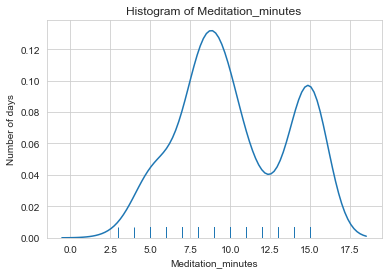

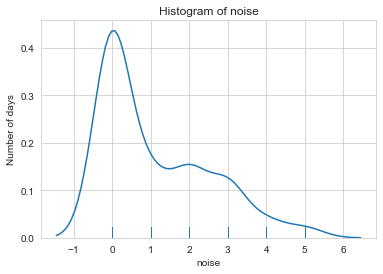

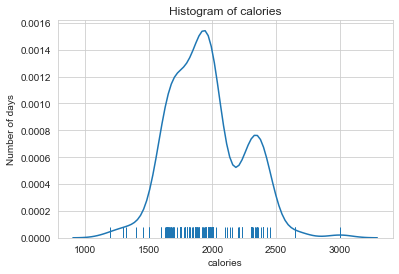

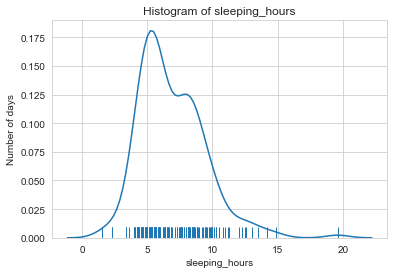

In [9]:
def plot_density_hist(sleep_hours, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(sleep_hours[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of days')# Set text for y axis
        plt.show()
        
plot_density_hist(sleep_hours, num_cols)

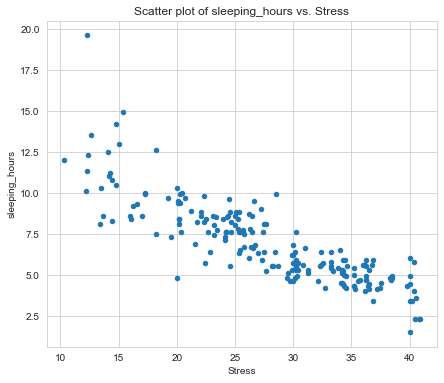

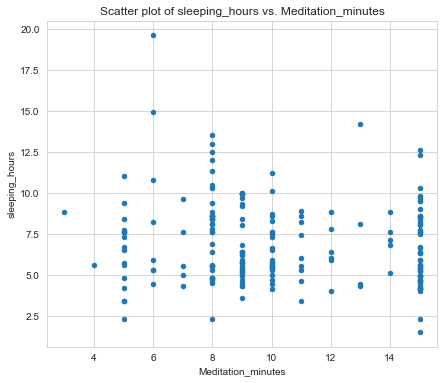

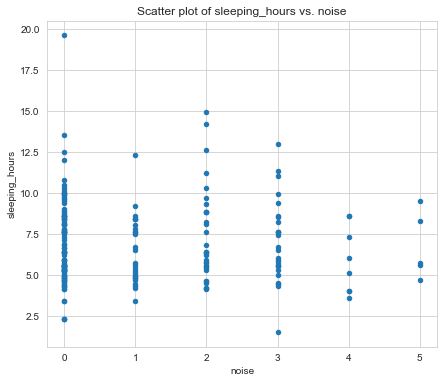

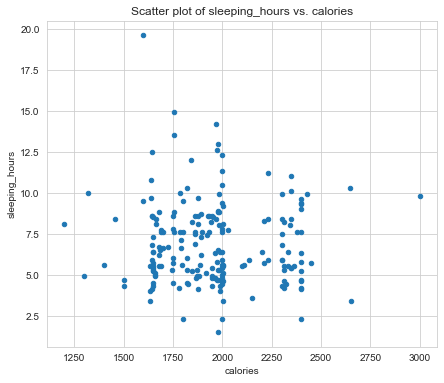

In [10]:
def plot_scatter(sleep_hours, cols, col_y = 'sleeping_hours'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        sleep_hours.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()

num_cols = ['Stress','Meditation_minutes', 'noise','calories']
plot_scatter(sleep_hours, num_cols)

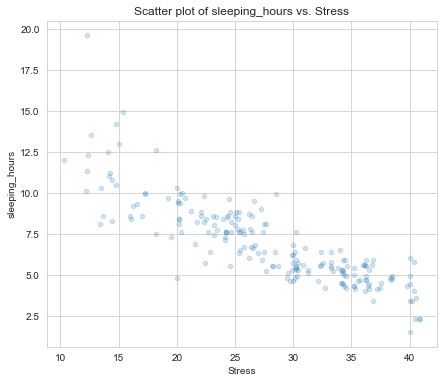

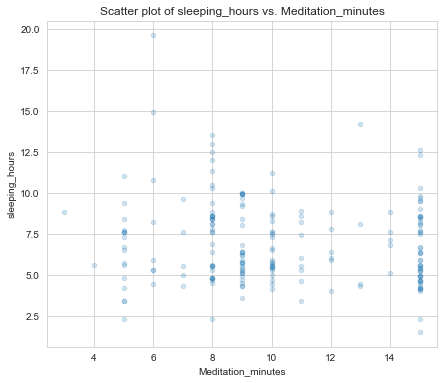

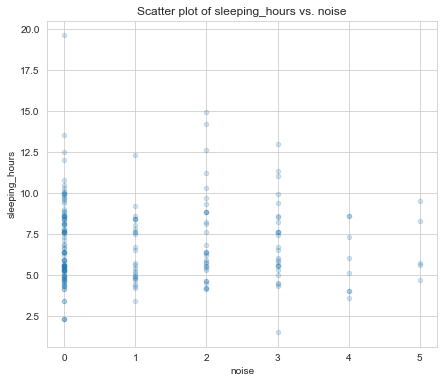

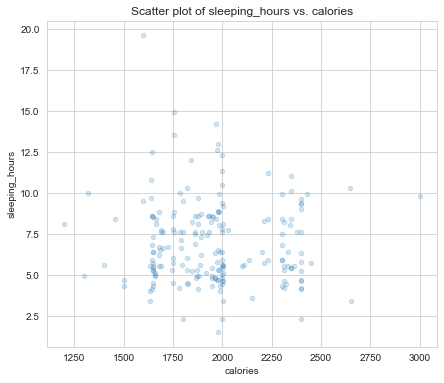

In [11]:
def plot_scatter_t(sleep_hours, cols, col_y = 'sleeping_hours', alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        sleep_hours.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

plot_scatter_t(sleep_hours, num_cols, alpha = 0.2) 

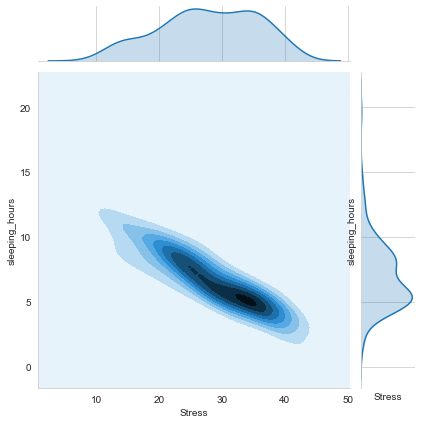

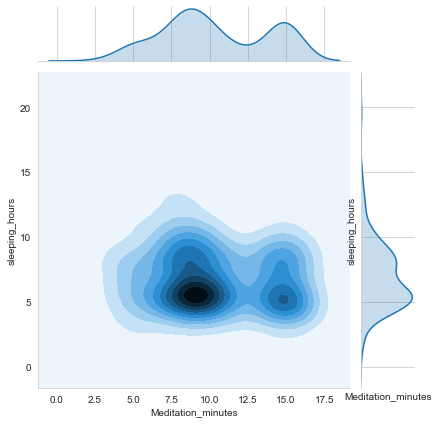

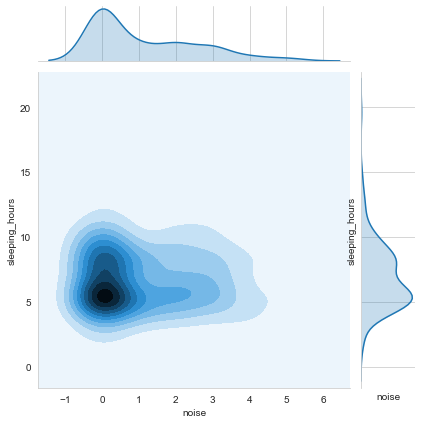

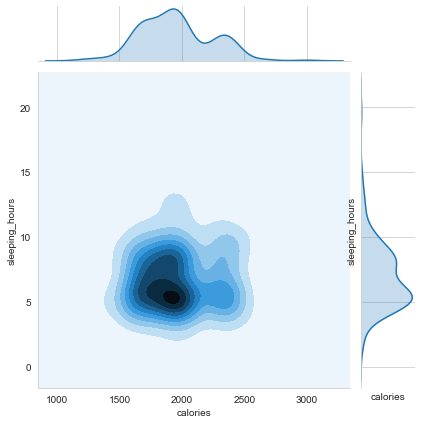

In [12]:
def plot_desity_2d(sleep_hours, cols, col_y = 'sleeping_hours', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=sleep_hours, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

num_cols =   ['Stress', 'Meditation_minutes', 'noise', 'calories']      
        
plot_desity_2d(sleep_hours, num_cols) 

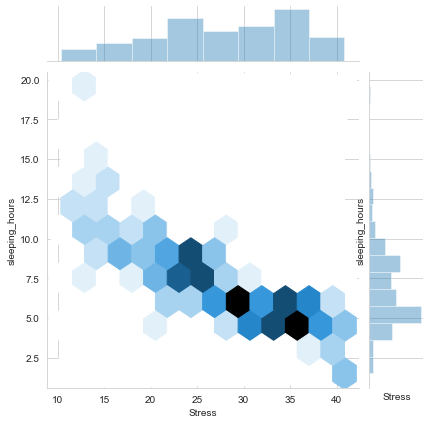

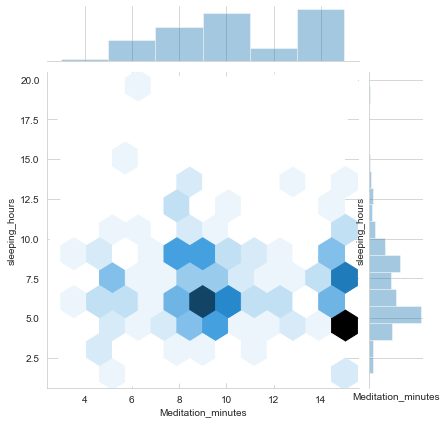

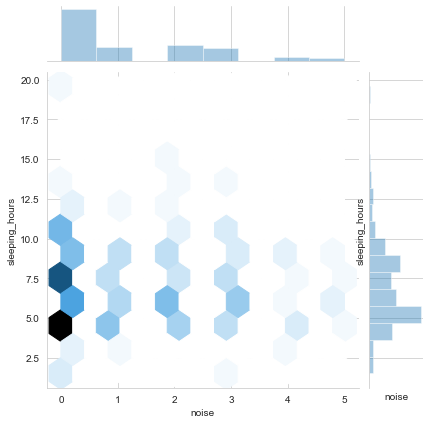

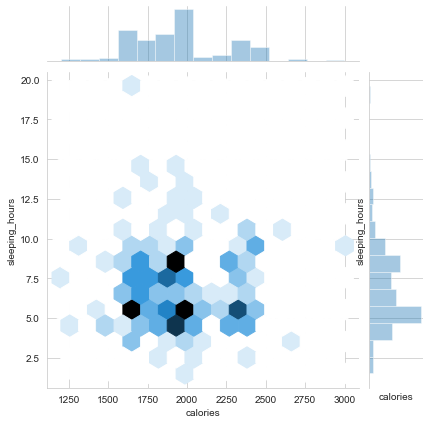

In [13]:
plot_desity_2d(sleep_hours, num_cols, kind = 'hex') 

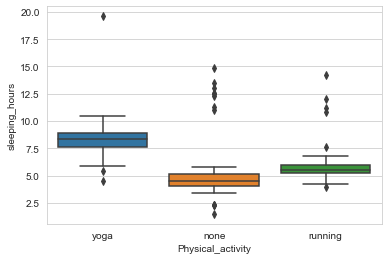

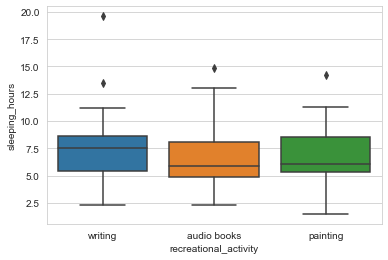

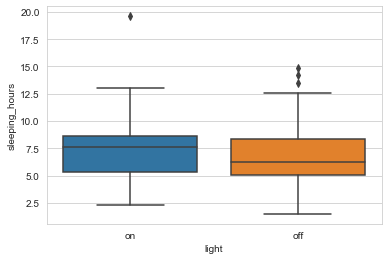

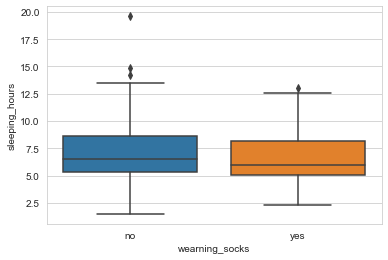

In [14]:
def plot_box(sleep_hours, cols, col_y = 'sleeping_hours'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=sleep_hours)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['Physical_activity','recreational_activity', 'light', 'wearning_socks']
plot_box(sleep_hours, cat_cols)

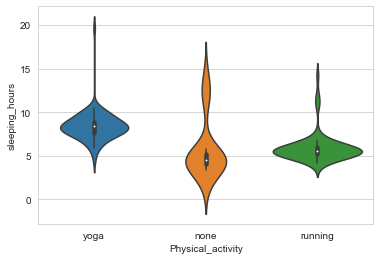

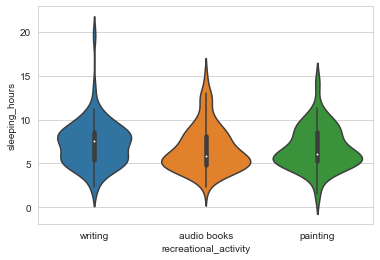

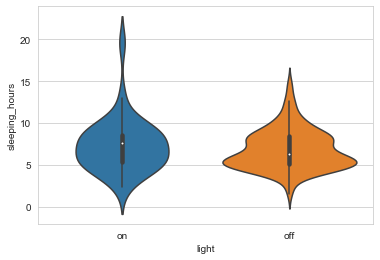

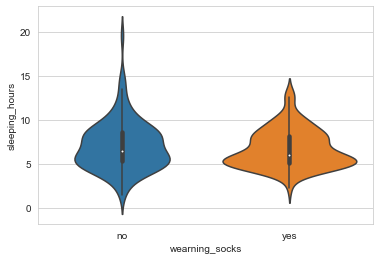

In [15]:
def plot_violin(sleep_hours, cols, col_y = 'sleeping_hours'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=sleep_hours)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_violin(sleep_hours, cat_cols)

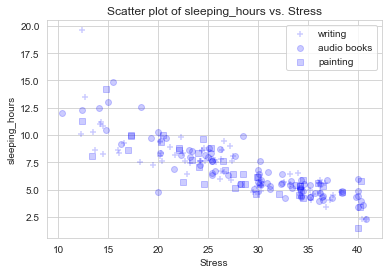

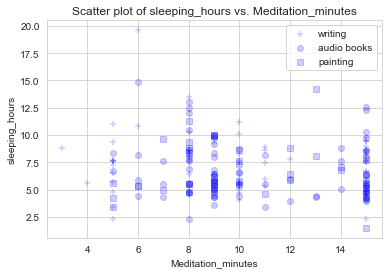

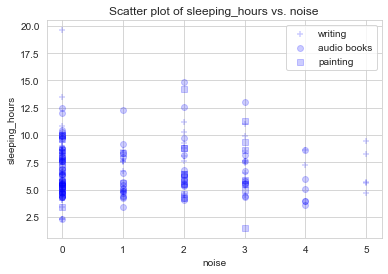

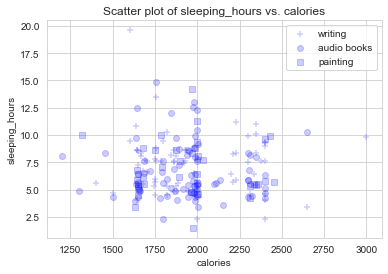

In [16]:
def plot_scatter_shape(sleep_hours, cols, shape_col = 'recreational_activity', col_y = 'sleeping_hours', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = sleep_hours[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = sleep_hours[sleep_hours[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
num_cols = ['Stress', 'Meditation_minutes', 'noise', 'calories']
plot_scatter_shape(sleep_hours, num_cols) 

c:\users\prana\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


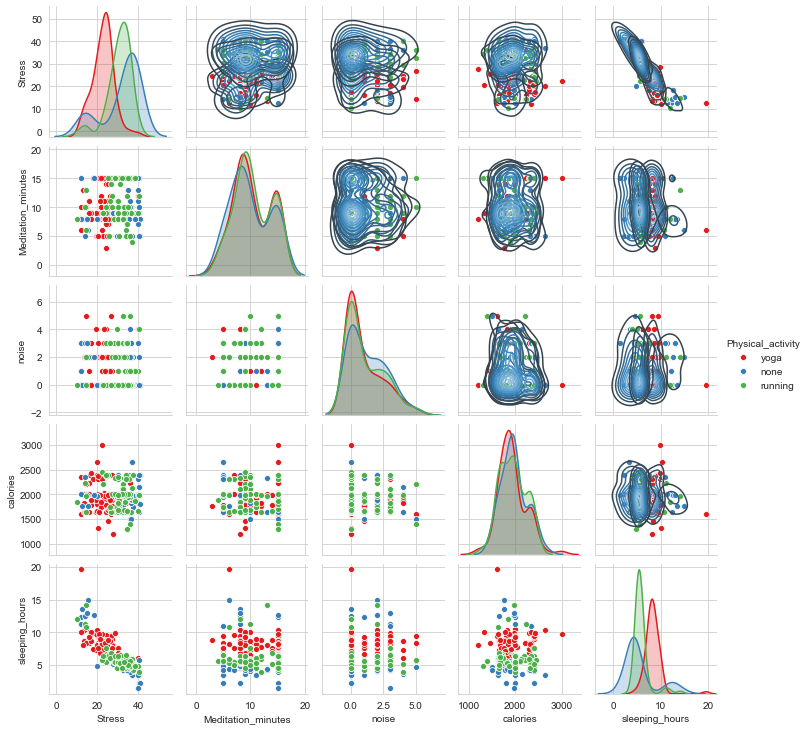

In [17]:
num_cols = ['Stress', 'Meditation_minutes', 'noise', 'calories', 'sleeping_hours', 'Physical_activity'] 
sns.pairplot(sleep_hours[num_cols], hue='Physical_activity', palette="Set1", diag_kind="kde", size=2).map_upper(sns.kdeplot, cmap="Blues_d")